In [19]:
import pandas as pd
import matplotlib.pyplot as plt

### **Product Data Analysis**
1. Total number of orders by Month.
2. Monthly Revenue.  

In [55]:
df = pd.read_excel('Online Retail.xlsx',
                   sheet_name='Online Retail',
                   parse_dates=['InvoiceDate'],
                   index_col='InvoiceDate')

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [53]:
df['Quantity'].describe()

,Quantity
count,531285.000000
mean,10.655262
std,156.830323
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [68]:
monthly_orders = df['InvoiceNo'].resample('M').nunique()
monthly_orders

,InvoiceNo
InvoiceDate,
2010-12-31,2025
2011-01-31,1476
2011-02-28,1393
2011-03-31,1983
2011-04-30,1744
2011-05-31,2162
2011-06-30,2012
2011-07-31,1927
2011-08-31,1737


### Total number of orders by Month.

In [69]:
type(monthly_orders)

pandas.core.series.Series

In [71]:
type(df['Quantity'])

pandas.core.series.Series

In [78]:
monthly_orders.values

array([2025, 1476, 1393, 1983, 1744, 2162, 2012, 1927, 1737, 2327, 2637,
       3462, 1015])

In [79]:
monthly_orders_df = pd.DataFrame(monthly_orders.values)
monthly_orders_df

,0
0,2025
1,1476
2,1393
3,1983
4,1744
5,2162
6,2012
7,1927
8,1737
9,2327


In [113]:
dates = monthly_orders.index
range_numbers = range(len(dates))

def format_dates(dates):
    formatted_dates = []
    for date in dates:
      format = f"{date.month}-{date.year}" # dates[0].strftime("%m/%Y")
      formatted_dates.append(format)

    return formatted_dates

['12-2010',
 '1-2011',
 '2-2011',
 '3-2011',
 '4-2011',
 '5-2011',
 '6-2011',
 '7-2011',
 '8-2011',
 '9-2011',
 '10-2011',
 '11-2011',
 '12-2011']

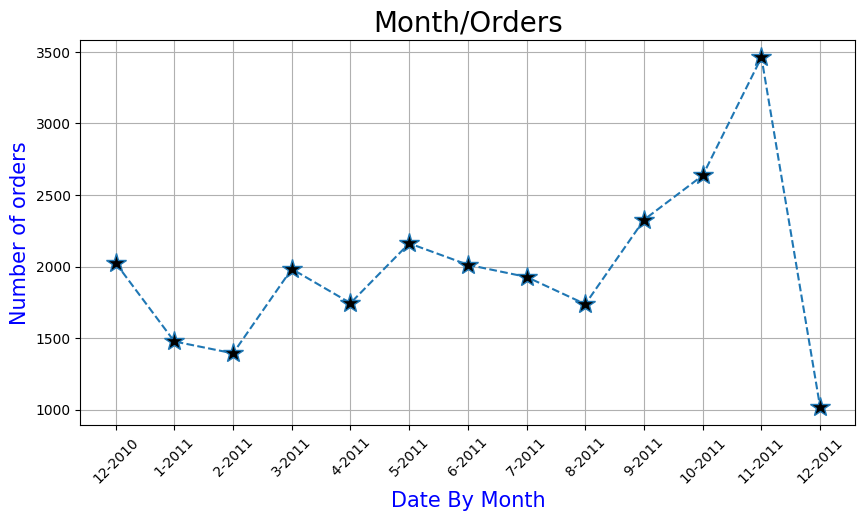

In [116]:
monthly_orders_df.plot(grid=True,marker="*",ms=15,ls="--",mfc="black",legend=False,figsize=(10,5))
dates = monthly_orders.index

plt.xlabel("Date By Month",size=15,c="blue")
plt.ylabel("Number of orders",size=15,c="blue")
plt.title("Month/Orders",size=20)
plt.xticks(range_numbers,format_dates(dates),rotation=45)
plt.show()

In [117]:
dec_date_2011 = pd.to_datetime('2011-12-01')

In [118]:
dec_date_2011

Timestamp('2011-12-01 00:00:00')

In [133]:
df[df.index >= dec_date_2011]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-12-01 08:12:00,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,4.15,13853.0,United Kingdom
2011-12-01 08:14:00,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,1.25,15197.0,United Kingdom
2011-12-01 08:14:00,C579890,23374,RED SPOT PAPER GIFT BAG,-1,0.82,15197.0,United Kingdom
2011-12-01 08:14:00,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,0.85,15197.0,United Kingdom
2011-12-01 08:18:00,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,25.00,13644.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


In [123]:
newdf_before_dec_2011 = df[df.index < dec_date_2011]

In [124]:
new_monthly_orders = newdf_before_dec_2011['InvoiceNo'].resample('M').nunique()
new_monthly_orders

,InvoiceNo
InvoiceDate,
2010-12-31,2025
2011-01-31,1476
2011-02-28,1393
2011-03-31,1983
2011-04-30,1744
2011-05-31,2162
2011-06-30,2012
2011-07-31,1927
2011-08-31,1737


In [128]:
new_dates = new_monthly_orders.index
new_range_numbers = range(len(new_dates))
new_monthly_orders_df = pd.DataFrame(new_monthly_orders.values)
new_monthly_orders_df

,0
0,2025
1,1476
2,1393
3,1983
4,1744
5,2162
6,2012
7,1927
8,1737
9,2327


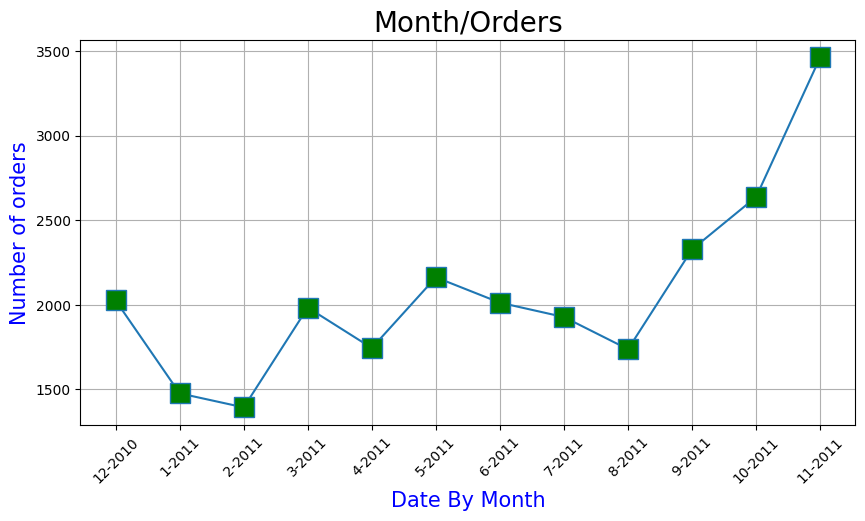

In [131]:
new_monthly_orders_df.plot(grid=True,marker="s",ms=15,mfc="green",legend=False,figsize=(10,5))
new_dates = new_monthly_orders.index

plt.xlabel("Date By Month",size=15,c="blue")
plt.ylabel("Number of orders",size=15,c="blue")
plt.title("Month/Orders",size=20)
plt.xticks(new_range_numbers,format_dates(new_dates),rotation=45)
plt.show()